<a href="https://colab.research.google.com/github/ninemoonz/deepLearning/blob/main/Keras_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(keras.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Keras Linear Regression

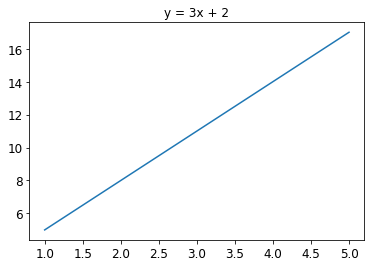

In [ ]:
x = np.arange(1, 6)

y = 3 * x + 2

plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### How to make model from Keras

In [ ]:
# Sequential API
# CAN'T make multiple input or multiple output structure

# list type model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(5),
 tf.keras.layers.Dense(1)                               
])

# Dense = percentron - a unit of a model in layer

In [ ]:
# add function to the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(11))

In [ ]:
# input data structure

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)                             
])

In [ ]:
# Simple Regression Model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Model Compile
- This step config optimizer, loss function, and metrics

In [ ]:
# 3 Ways to set the compile model

# parameter config using long string 
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# parameter config using short string
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# config as class instance
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Model Training with short compile


In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

#model training
history=model.fit(x, y, epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 346ms/step - loss: 252.4981 - mse: 252.4981 - mae: 14.7161
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 147.1873 - mse: 147.1873 - mae: 11.2643
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 85.8172 - mse: 85.8172 - mae: 8.6291
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 50.0534 - mse: 50.0534 - mae: 6.6173
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 29.2117 - mse: 29.2117 - mae: 5.0815
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 17.0659 - mse: 17.0659 - mae: 3.9089
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 9.9877 - mse: 9.9877 - mae: 3.0137
Epoch 8/2000
1/1 [==============================] - 0s 15ms/step - loss: 5.8625 - mse: 5.8625 - mae: 2.3303
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 3.4583 - mse: 3.4583 - mae: 1.8084
Epoch 10/2000

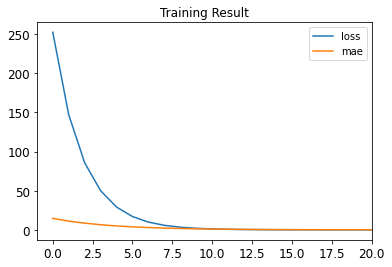

In [ ]:
# visualization
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Training Result')
plt.legend()
plt.show()

In [ ]:
# Evaluation
model.evaluate(x, y)

1/1 [==============================] - 0s 178ms/step - loss: 1.4103e-07 - mse: 1.4103e-07 - mae: 3.2244e-04


[1.4102502632340475e-07, 1.4102502632340475e-07, 0.0003224372921977192]

In [ ]:
# Prediction
model.predict([10])

array([[32.001556]], dtype=float32)

## Image Classification using Sequential API in Keras
- built-in dataset
  1. boston housing: Regression
  2. cifar10: Classification
  3. CIFAR100: Classification
  4. MNIST: Classification
  5. IMDb: Movie data Classification
  6. reutuers: News topic classification

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Looking the shape of the dataset
print(x_train.shape, y_train.shape)
print(x_train.dtype, y_train.dtype)

(60000, 28, 28) (60000,)
uint8 uint8


In [ ]:
#Splitting training data into training data and validation data
x_tr, x_val = x_train[:50000]/255., x_train[50000:]/255.
y_tr, y_val = y_train[:50000], y_train[50000:]
x_test = x_test / 255.


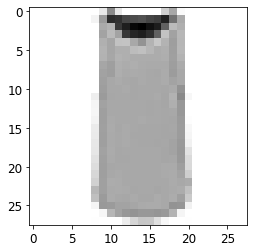

In [ ]:
# image output
plt.imshow(x_tr[2], cmap='binary') #black and white
plt.show()

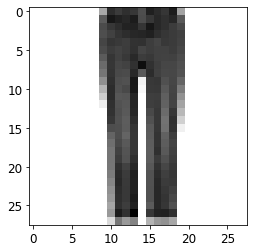

In [ ]:
plt.imshow(x_val[2], cmap='binary')

In [ ]:
#label 
print(y_tr[2])

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "AnKle Boot"]
print(class_names[y_tr[2]])

0
T-shirt/top


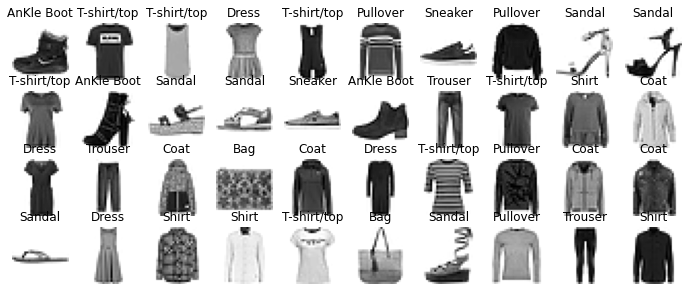

In [ ]:
# print out image with label
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(x_tr[index], cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_tr[index]], fontsize=12)
  
plt.show()

In [ ]:
# Flatten layer: layer to make the input into 1 dimensional
print("Original shape: ", x_tr.shape)
# 1 dimensional
print('1D shape: ', x_tr.reshape(50000,-1).shape)
print('1D shape: ', tf.keras.layers.Flatten()(x_tr).shape)

Original shape:  (50000, 28, 28)
1D shape:  (50000, 784)
1D shape:  (50000, 784)


In [ ]:
# Activation Function into Dense Layer

tf.keras.layers.Dense(128, activation='relu')

#Sequential Instance
model = tf.keras.Sequential([tf.keras.layers.Dense(128),
                             tf.keras.layers.Activation('relu')])

In [ ]:
# model with 10 class
model = keras.models.Sequential()

# input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden Layer
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

# Output Layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               235500    
                                                                 
 dense_23 (Dense)            (None, 100)               30100     
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


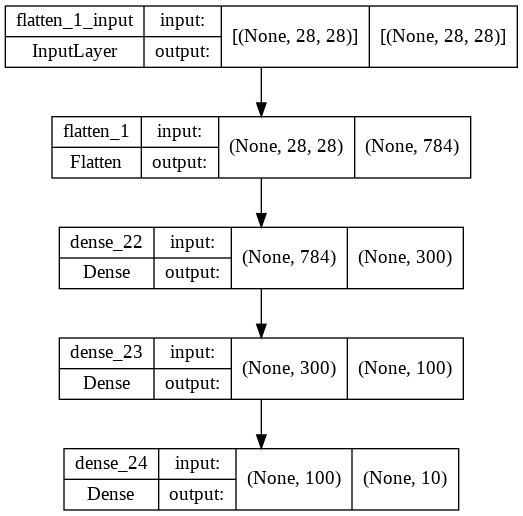

In [ ]:
# model structure visualization
keras.utils.plot_model(model, 'fashion_mnist_model.png', show_shapes=True)

In [ ]:
# model compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# model training
history = model.fit(x_tr, y_tr, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7297 - accuracy: 0.7633 - val_loss: 0.5394 - val_accuracy: 0.8173
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4947 - accuracy: 0.8292 - val_loss: 0.5053 - val_accuracy: 0.8156
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4472 - accuracy: 0.8441 - val_loss: 0.4531 - val_accuracy: 0.8433
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4207 - accuracy: 0.8522 - val_loss: 0.4334 - val_accuracy: 0.8480
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4007 - accuracy: 0.8588 - val_loss: 0.4297 - val_accuracy: 0.8445
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3859 - accuracy: 0.8645 - val_loss: 0.4269 - val_accuracy: 0.8482
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3720 - accuracy: 0.8677 - val_loss: 0.4090 - val_accu

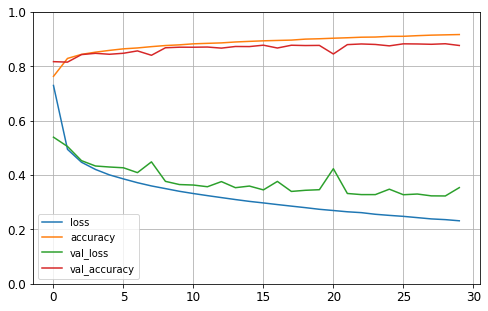

In [ ]:
# learning curve visualization
pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)

plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Generalization difference
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3742 - accuracy: 0.8695


[0.37423938512802124, 0.8694999814033508]

In [ ]:
# Prediction

x_new = x_test[:3]
y_proba = model.predict(x_new)
print(y_proba.round(2))

y_pred = np.argmax(model.predict(x_new), axis= -1)
print(y_pred)

print(np.array(class_names)[y_pred])
                   

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['AnKle Boot' 'Pullover' 'Trouser']


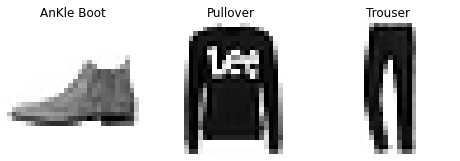

In [ ]:
# predicted label and image compare
plt.figure(figsize=(8, 3))

for index, image in enumerate(x_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
  plt.title(class_names[y_pred[index]], fontsize=12)

plt.show()

## Multiple Perceptron for Regression

In [ ]:
# Call data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, random_state=42)

In [ ]:
# Scaling
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Building model, training, evaluation

model = keras.models.Sequential([
                                 keras.layers.Dense(30, input_shape=x_tr.shape[1:], activation='relu'),
                                 keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(x_tr, y_tr, epochs=100, validation_data=(x_val, y_val))

mse_test = model.evaluate(x_test, y_test)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 1.6419 - val_loss: 0.8077
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.7047 - val_loss: 0.6736
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6243
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5977
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5706 - val_loss: 0.5708
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5472 - val_loss: 0.5538
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5370
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.5257
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 0.5142
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.5040
E

No handles with labels found to put in legend.


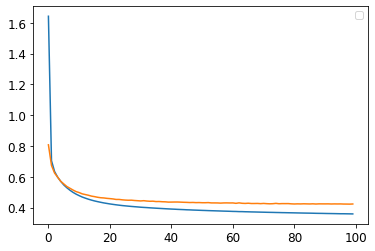

In [ ]:
# epoch visualization
plt.plot(pd.DataFrame(history.history))
plt.legend()
plt.show()

In [ ]:
# Prediction
x_new = x_test[:5]
y_pred = model.predict(x_new)
print(y_pred)

[[0.56021893]
 [1.7225323 ]
 [4.31801   ]
 [2.4699101 ]
 [3.0793424 ]]


## Functional API

In [ ]:
# Layer

# Input layer
input_layer = keras.layers.Input(shape = x_tr.shape[1:])

# Hidden layers
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

#Concat
concat = keras.layers.concatenate([input_layer, hidden2])

#output layer
output_layer = keras.layers.Dense(1)(concat)

# model

model = keras.models.Model(inputs=[input_layer], outputs=-output_layer)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [ ]:
# traning and evaluation
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history=model.fit(x_tr, y_tr, epochs=30, validation_data=(x_val, y_val))

mse_test = model.evaluate(x_test, y_test)

y_pred = model.predict(x_new)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 1.9555 - val_loss: 0.8777
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8097 - val_loss: 0.7112
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6852 - val_loss: 0.6616
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6352 - val_loss: 0.6238
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5919
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5571 - val_loss: 0.5663
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5287 - val_loss: 0.5454
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5073 - val_loss: 0.5278
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4877 - val_loss: 0.5134
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4731 - val_loss: 0.5022
Epoch 11/3

In [ ]:
# multi layer input and output

input_A = keras.layers.Input(shape=[5], name='input_A')
input_B = keras.layers.Input(shape=[6], name='input_B')

# Hidden Layer
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

#Concatenate
concat = keras.layers.concatenate([input_A, hidden2])

# Output Layer
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
# multi output compile
# if set a one loss fnction, it will apply the same loss function for both
# if the loss function should be different, set it up as a list form
# and setting different weight can be applied by using loss_weights
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(1e-3))

In [ ]:
# two inputs two outputs
# therefore need two datas each per learning

x_tr_A, x_tr_b = x_tr[:, :5], x_tr[:, 2:]
x_val_A, x_val_B = x_val[:, :5], x_val[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]

x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [ ]:
model.evaluate([x_test_A, x_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 5.3205 - main_output_loss: 5.2727 - aux_output_loss: 5.7504


[5.320471286773682, 5.272706031799316, 5.750375270843506]

In [ ]:
# prediction
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])
print(y_pred_main, y_pred_aux)

[[0.4374936 ]
 [0.3462659 ]
 [0.12574168]] [[-0.06061707]
 [-0.01140945]
 [-0.1231539 ]]


## Model build using Inheritance

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    
    #call 에서 출력 층을 리턴해야함 
    return main_output, aux_output


model = WideAndDeepModel(30, activation='relu')

In [ ]:
model = WideAndDeepModel(30, activation='relu')

In [ ]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit((x_tr_A, x_tr_b), (y_tr, y_tr), epochs=30, validation_data=((x_val_A, x_val_B),(y_val, y_val)))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
363/363 [==============================] - 4s 6ms/step - loss: 2.2525 - output_1_loss: 2.0189 - output_2_loss: 4.3545 - val_loss: 1.2151 - val_output_1_loss: 0.9895 - val_output_2_loss: 3.2455
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 1.0489 - output_1_loss: 0.8583 - output_2_loss: 2.7644 - val_loss: 0.9102 - val_output_1_loss: 0.7612 - val_output_2_loss: 2.2513
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8499 - output_1_loss: 0.7183 - output_2_loss: 2.0346 - val_loss: 0.8039 - val_output_1_loss: 0.6923 - val_output_2_loss: 1.8088
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7706 - output_1_loss: 0.6679 - output_2_loss: 1.6955 - val_loss: 0.7518 - val_output_1_loss: 0.6585 - val_output_2_loss: 1.5913
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7236 - output_1_loss: 0.6343 - output_2_loss: 1.5267 - val_loss: 0.7146 - val_output_1_loss: 0.6288 - val_ou

## Model Storing and Restoring

In [ ]:
# model 
model = keras.models.Sequential([
                                 keras.layers.Dense(30, input_shape=[8]),
                                 keras.layers.Dense(30, activation='relu'),
                                 # number of perceptron on regression output is one
                                 keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val, y_val))

mse_test = model.evaluate(x_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 1.6335 - val_loss: 0.7217
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6630 - val_loss: 0.6263
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5795 - val_loss: 0.5611
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5150 - val_loss: 0.5273
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4772 - val_loss: 0.4995
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4535 - val_loss: 0.4867
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4394 - val_loss: 0.4746
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4304 - val_loss: 0.4675
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4237 - val_loss: 0.4614
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4183 - val_loss: 0.4557
Epoch 11/2

In [ ]:
model.save('my_keras_model.h5')

In [ ]:
#model restore
model = keras.models.load_model('my_keras_model.h5')
model.predict(x_new)

array([[0.43810967],
       [1.7912569 ],
       [4.1301236 ],
       [2.4838333 ],
       [3.0386524 ]], dtype=float32)

## Callback

### Model Cehck point

In [ ]:
model = keras.models.Sequential([
                                keras.layers.Dense(30, input_shape=[8]),
                                keras.layers.Dense(30, activation='relu'),
                                keras.layers.Dense(1)
])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint_cb])

model = keras.models.load_model('my_keras_model.h5')

mse_test = model.evaluate(x_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 1.5190 - val_loss: 0.7912
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7394 - val_loss: 0.6800
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6443 - val_loss: 0.6191
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5867
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5398 - val_loss: 0.5497
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5048 - val_loss: 0.5260
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4798 - val_loss: 0.5071
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4612 - val_loss: 0.4958
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4471 - val_loss: 0.4814
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4368 - val_loss: 0.4724
Epoch 11/2

## Early Stopping Callbacks

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_tr, y_tr, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_cb])

model = keras.models.load_model('my_keras_model.h5')

mse_test = model.evaluate(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
363/363 [==============================] - 3s 5ms/step - loss: 0.3991 - val_loss: 0.4432
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3966 - val_loss: 0.4455
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3956 - val_loss: 0.4428
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3935 - val_loss: 0.4428
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3921 - val_loss: 0.4404
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3901 - val_loss: 0.4407
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3892 - val_loss: 0.4390
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3877 - val_loss: 0.4391
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3861 - val_loss: 0.4350
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3847 - val_lo

In [ ]:
# User config callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('\n val/train: ', logs['val_loss']/logs['loss'])


model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(x_tr, y_tr, epochs=100, validation_data=(x_val, y_val), callbacks=[val_train_ratio_cb])

mse_test = model.evaluate(x_test, y_test)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


358/363 [============================>.] - ETA: 0s - loss: 0.3964
 val/train:  1.1139270782564694
363/363 [==============================] - 2s 4ms/step - loss: 0.3967 - val_loss: 0.4419
Epoch 2/100
351/363 [============================>.] - ETA: 0s - loss: 0.3953
 val/train:  1.1239625978568124
363/363 [==============================] - 1s 4ms/step - loss: 0.3951 - val_loss: 0.4441
Epoch 3/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3967
 val/train:  1.1213915051220862
363/363 [==============================] - 1s 3ms/step - loss: 0.3938 - val_loss: 0.4416
Epoch 4/100
356/363 [============================>.] - ETA: 0s - loss: 0.3916
 val/train:  1.1263974823802807
363/363 [==============================] - 1s 2ms/step - loss: 0.3920 - val_loss: 0.4416
Epoch 5/100
359/363 [============================>.] - ETA: 0s - loss: 0.3901
 val/train:  1.124158231466941
363/363 [==============================] - 1s 2ms/step - loss: 0.3907 - val_loss: 0.4392
Epoch 6/100
363/36

## Neural Hyper Parameter Tuning